In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import scipy.optimize as opt

In [3]:
df = pd.read_csv("data/house/house.csv")
df

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


In [4]:
df["loyer_m2"]=df["loyer"]/df["surface"]
df

,loyer,surface,loyer_m2
0,1330,37,35.945946
1,1400,32,43.750000
2,904,26,34.769231
3,955,30,31.833333
4,2545,70,36.357143
...,...,...,...
540,1490,48,31.041667
541,2020,58,34.827586
542,2050,70,29.285714
543,1220,42,29.047619


In [10]:
name1 = "loyer"
name2 = "surface"
df[f"{name1}_{name2}"] = df[name1].astype(str) + "_" + df[name2].astype(str)
df

,loyer,surface,loyer_m2,loyer_surface
0,1330,37,35.945946,1330_37
1,1400,32,43.750000,1400_32
2,904,26,34.769231,904_26
3,955,30,31.833333,955_30
4,2545,70,36.357143,2545_70
...,...,...,...,...
540,1490,48,31.041667,1490_48
541,2020,58,34.827586,2020_58
542,2050,70,29.285714,2050_70
543,1220,42,29.047619,1220_42


In [11]:
df.to_csv("data/house/out.csv", index=None)

In [13]:
df2 = df[(df["surface"]<200) & (df["loyer"] < 10000)]
df2

,loyer,surface,loyer_m2,loyer_surface
0,1330,37,35.945946,1330_37
1,1400,32,43.750000,1400_32
2,904,26,34.769231,904_26
3,955,30,31.833333,955_30
4,2545,70,36.357143,2545_70
...,...,...,...,...
540,1490,48,31.041667,1490_48
541,2020,58,34.827586,2020_58
542,2050,70,29.285714,2050_70
543,1220,42,29.047619,1220_42


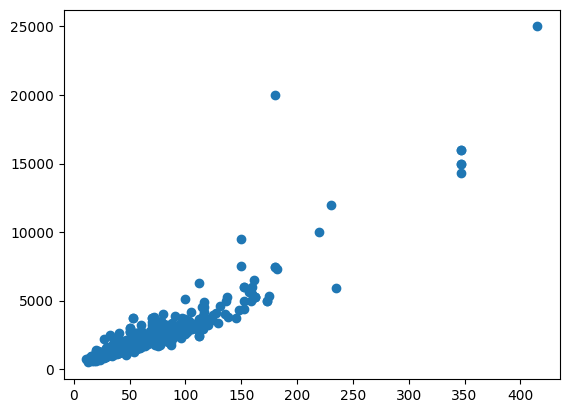

In [14]:
plt.scatter(df["surface"], df["loyer"])

In [15]:
df[df.columns[1]]

0      37
1      32
2      26
3      30
4      70
       ..
540    48
541    58
542    70
543    42
544    44
Name: surface, Length: 545, dtype: int64

In [16]:
# TP
# Charge house.csv
# Calculer loyer_m2
# Filtrer les surfaces < 200
# Calculer le loyer moyen et std
# Filtrer le point si est < mean + 3*std


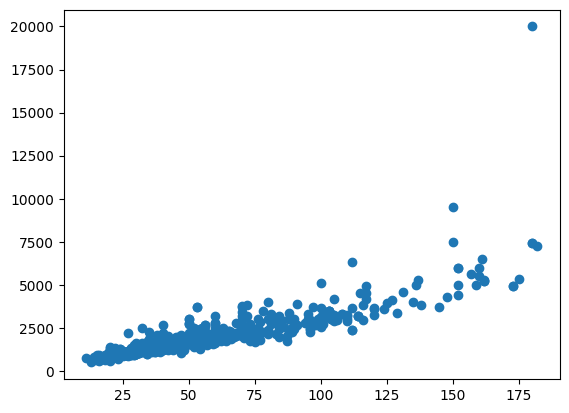

In [17]:
df_filtre = df[df["surface"] < 200]
plt.scatter(df_filtre["surface"], df_filtre["loyer"])

In [18]:
mean = np.mean(df["loyer"])
std = np.std(df["loyer"])
mean, std

(2307.502752293578, 2199.343825516252)

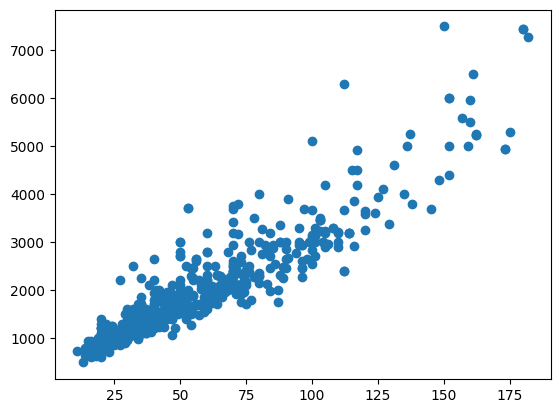

In [19]:
df_filtre = df_filtre[df_filtre["loyer"] < mean + 3 * std]
plt.scatter(df_filtre["surface"], df_filtre["loyer"])

In [21]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_filtre["surface"], df_filtre["loyer"])
slope, intercept, rvalue, pvalue, stderr

(30.42268971766891,
 274.60530810239857,
 0.9169244285569264,
 2.1336750163118076e-214,
 0.5740469492341341)

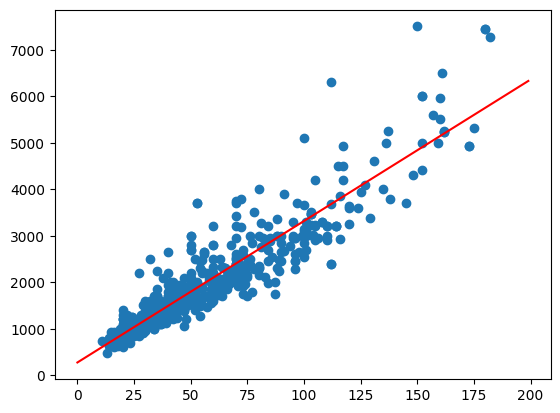

In [27]:
x = np.arange(200)
y = slope * x + intercept
plt.scatter(df_filtre["surface"], df_filtre["loyer"])
plt.plot(x, y, color="red")
plt.savefig("data/house/house.png")

In [30]:
def poly2(x, a, b, c):
    return a * x ** 2 + b * x + c

weight, conv = opt.curve_fit(poly2, df_filtre["surface"], df_filtre["loyer"])
weight, conv, np.mean(conv)

(array([6.18747427e-02, 2.05602426e+01, 5.64755894e+02]),
 array([[ 1.41845847e-04, -2.26093411e-02,  6.65160831e-01],
        [-2.26093411e-02,  3.91796846e+00, -1.24437358e+02],
        [ 6.65160831e-01, -1.24437358e+02,  4.58107490e+03]]),
 481.9337107076803)

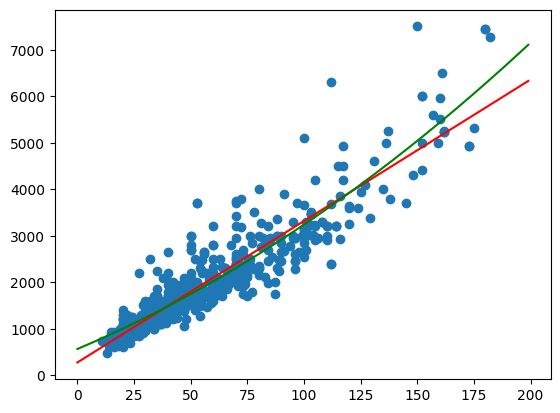

In [31]:
plt.scatter(df_filtre["surface"], df_filtre["loyer"])
plt.plot(x, y, color="red")
plt.plot(x, poly2(x, weight[0], weight[1], weight[2]), color="green")

In [ ]:
pd.concat([df, df_filtre], ignore_index=True)

In [ ]:
df.columns

In [ ]:
3/np.inf

In [ ]:
3+np.nan # Not a Number


In [ ]:
m1 = np.array([[1,2],[3,np.nan]])
m1

In [ ]:
m1 * 2

In [ ]:
np.sin(m1)

In [ ]:
np.mean(m1)

In [ ]:
np.nanmean(m1)